# LightGBM

- Light GBM은 Tree가 수직적으로 확장되는 반면에 다른 알고리즘은 Tree가 수평적으로 확장됨
- 즉 Light GBM은 leaf-wise 인 반면 다른 알고리즘은 level-wise
- 따라서 확장하기 위해서 max delta loss를 가진 leaf를 선택하게 된다.
- 그러므로 동일한 leaf를 확장할 때, leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 손실을 줄일 수 있다.

- Light GBM은 overfitting (과적합)에 민감하고 작은 데이터에 대해서 과적합하기 쉽다.
- row (행) 수에 대한 제한은 없지만 일반적으로 10,000 이상의 row (행) 을 가진 데이터에 사용하는 것을 바람직.

## 파라미터 - 예측에 지대한 영향
----------------
> n_estimators [default = 100] (@@@)

- 나무의 개수
- LGBM의 경우 1000개 이상 정도로 하는 것이 바람직하나 그 수가 너무 클수록 과적합 가능성 존재
----------------
> learning_rate [default = 0.1] (@@@)

- 학습 단계별로 가중치를 얼만큼 사용할지 결정/ 이전의 결과를 얼마나 반영할건지
- 일반적으로 n_estimator를 크게, learning_rate를 작게하여 성능을 향상시킬 수 있으나 시간이 길어지는 영향 고려   
- 0.05~0.1 정도로 맞추고 그 이상이면 다른 파라미터들을 튜닝할때 편. 미세한 정확도 조정을 원하면 더 작게 둬서 마른걸레를 빤다.
----------------
> max_depth [default = -1](제한없이 분기) (@@@)

- 모델 과적합을 다룰 때 사용. 만약 과적합된 것 같다고 느끼신다면 max_depth 값을 줄일 것
----------------
> booster (@@@)

- 어떤 부스터 구조를 쓸지 결정
      
      1) gdbt : Traditional Gradient Boosting Decision Tree
      2) rf : Random Forest
      3) dart : Dropouts meet Multiple Additive Regression Trees
----------------
> eval_metric[default - 회귀 : rmse, 분류 : error] (@@@)

- 검증에 사용되는 함수 정의
- eval_set : 성능 평가를 수행할 데이터 세트

      1) rmse : root mean square error
      2) mae : mean absolute error
      3) logloss : negative log-likelihood
      4) error : binary classificaion error rate (임계값 0.5)
      5) merror : multiclass classification error rate
      6) mlogloss : multiclass logloss
      7) auc : area under the curve

----------------

## 파라미터 - 정밀한 튜닝
----------------
> early_stopping_rounds (@@)

- 최대한 몇 개의 트리를 완성해볼 것인지 valid loss에 더이상 진전이 없으면 멈춤
- 과적합을 방지할 수 있음, n_estimators 가 높을때 주로 사용
----------------
> subsample [default = 1] (@@)

- 각 트리마다 데이터 샘플링 비율
- over-fitting 방지(일반적으로 0.5 ~ 1)
----------------
> colsample_bytree [default = 1] (@@)

- 각 트리마다 컬럼 샘플링 비율(일반적으로 0.5 ~ 1)
- 0.7~0.9 정도로 세팅하는 편이 일반적
- Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에서 80%를 랜덤하게 선택하는 것을 의미합니다.

----------------

## 파라미터 - Default 값을 추천

> nthread (@)

- 몇개의 쓰레드를 동시에 처리하도록 할지 결정(default는 최대한 많이)
----------------
> num_feature (@)

- feature 차원의 숫자를 정해야 하는 경우 옵션 세팅(default는 최대한 많이)
----------------
> min_child_weight [default = 1] (@)

- child 에서 필요한 모든 관측치에 대한 가중치의 최소 합
- 이 값보다 샘플 수가 작으면 leaf node가 되는 것
- 너무 크면 under-fitting 될 수 있음
----------------
> gamma [default = 0] (@)

- 트리에서 추가적으로 가지를 나눌지를 결정할 최소 손실 감소 값
- 값이 클수록 과적합 감소 효과
----------------
> reg_lambda [default = 1] (@) 

- L2 regularization(ex. 릿지) 가중치(클수록 보수적) 
----------------
> reg_alpha [default = 0] (@)

- L1 regularization(ex. 라쏘) 가중치(클수록 보수적)
- 특성이 매우 많은때 사용해볼만 함
----------------
> scale_pos_weight [default = 1] (@)

- 데이터가 불균형할때 사용, 0보다 큰 값
- 보통 값을 음성 데이터 수/ 양성 데이터 수 값으로 함
----------------      
> objective [default = reg:linear] (@) (목적 함수)

      1) regression: 회귀분석
      2) binary: 이진 분류
      3) multiclass: 다중 분류

In [19]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import warnings
import matplotlib.pyplot as plt
from lightgbm import plot_importance
%matplotlib inline
warnings.filterwarnings('ignore')

In [16]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('-'*30)
    print('Accuracy : {0:.4f} / Precision : {1:.4f} / Recall : {2:.4f} / F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [15]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156)

lgbm = LGBMClassifier(n_estimators = 400)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = 'logloss', eval_set = evals, verbose = 1)
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [18]:
get_clf_eval(y_test,pred)

오차행렬
[[33  4]
 [ 1 76]]
------------------------------
Accuracy : 0.9561 / Precision : 0.9500 / Recall : 0.9870 / F1 : 0.9682


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

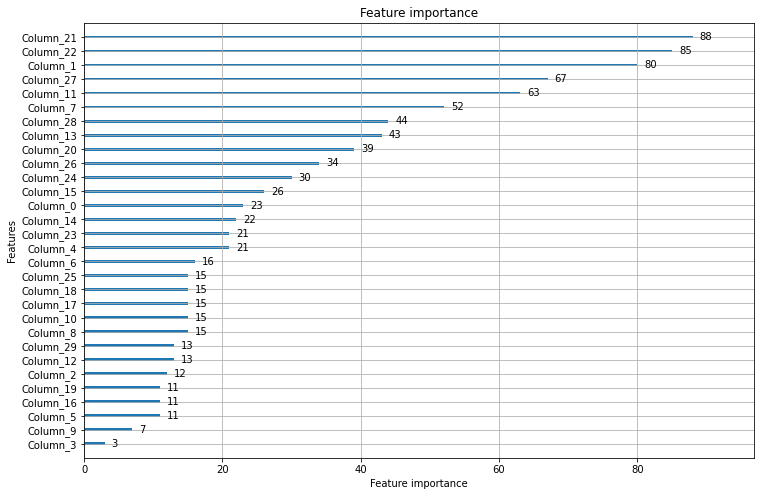

In [22]:
fig, ax = plt.subplots(figsize = (12,8))
plot_importance(lgbm,ax=ax)